# 4.2  Exercise

Amelia Farrell

DSC520

1/3/21


In [ ]:
# Loading packages needed
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

# Chapter 3

## Page 35-36: 3-1 
(Something like the class size paradox appears if you survey children and ask how many children are in their family…)


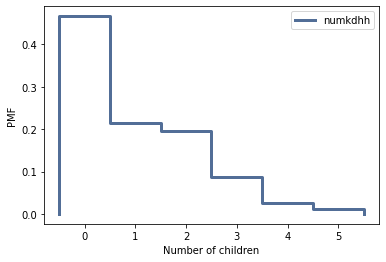

In [ ]:
# Data
resp = nsfg.ReadFemResp()

# PMF using thinkstats2.Pmf function
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

# PMF plot of actual distribution
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [ ]:
# biased PMF function (computes the biased PMF if we surveyed students and asked about the size of the classes they are in)
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

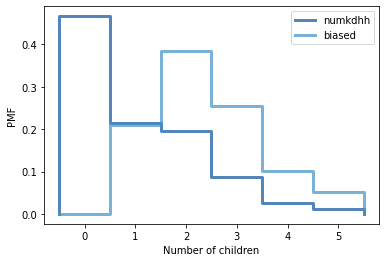

In [ ]:
# PMF of bias disribution
biased = BiasPmf(pmf, label='biased')

# PMF plot bias disribution
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [ ]:
# Unbias mean
pmf.Mean()

1.024205155043831

In [ ]:
# Bias mean
biased.Mean()

2.403679100664282

## Page 36: 3-2
(In “Summarizing Distributions” on page 22 we computed the mean of a sample by adding up the elements and dividing by n

In [ ]:
# Function called PmfMean
def PmfMean(pmf):
    mean=0
    for x, p in pmf.Items():
        mean += x*p
    return mean

PmfMean(pmf)

1.024205155043831

In [ ]:
# Function called PmfVar
def PmfVar(pmf):
    variance=0
    pmf_mean=PmfMean(pmf)
    for x, p in pmf.Items():
        variance += p * np.power(x-pmf_mean, 2)
    return variance

PmfVar(pmf)

1.4128643263531195

In [ ]:
# Checking if the new function's output matchs the thinkstats2 pmf and var functions
print('Mean Match?=', PmfMean(pmf) == thinkstats2.Pmf.Mean(pmf))
print('Variance Match? = ', PmfVar(pmf) == thinkstats2.Pmf.Var(pmf))

Mean Match?= True
Variance Match? =  True


## Page 47: 4-1 
(How much did you weigh at birth? If you don’t know, call your mother or someone else who knows…)

In [ ]:
# Data
live, firsts, others = first.MakeFrames()

In [ ]:
# Creating two CDFs of first borns and siblings from our "firsts" data set (data on baby birth order, weight, etc.)

first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

In [ ]:
# PercentileRank function
def PercentileRank(weights, yourweight):
    count = 0
    for score in weights:
        if score <= yourweight:
            count += 1

    percentile_rank = 100.0 * count / len(weights)
    return percentile_rank

In [ ]:
# Calcuating my percentile rank from the frist born babies since I am a first born
MyRank = first_cdf.PercentileRank(8.7)
print('I fall within the ', MyRank, 'percentile for my birth weight')

I fall within the  88.90671556268622 percentile for my birth weight


## Page 48: 4-2 
(The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability…)

In [ ]:
# Generating 1000 numbers from numpy.random
x = np.random.random(1000)

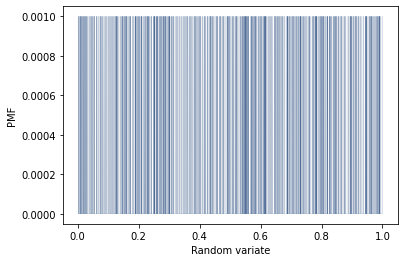

In [ ]:
# Plotting a PMF of x
pmf = thinkstats2.Pmf(x)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

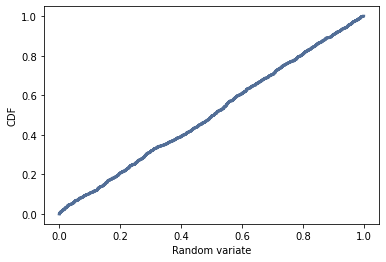

In [ ]:
# Plotting a CDF of x
cdf = thinkstats2.Cdf(x)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

Based on the above PMF and CDF we can see that the distribution of x (our ramdom 1,000 numbers) is a uniform distribution. We can assume a uniform distribution becuase the PMF forms a strait line across the top of the chart and the CDF also forms a starit line from 0 to 1.